In [ ]:
import os

os.environ['SPECIES'] = "Mouse"
from eval.visual_utils import (get_naming_dict, filter_dataframe, FigureStyle, pval2stars, Naming_Json, export_to_excel)
njson = Naming_Json()
exp = njson.exp
exp_short = exp.split("_")[0]
m_param_json_file = f"/g/data/yr31/zs2131/tasks/2023/RNA_expr_net/anal_mouse/training/{exp_short}/{exp}.param_config.json"
os.environ['PARAM_JSON_FILE'] = m_param_json_file

from utils.utils import get_device, get_model, get_config
from train.common_params_funs import get_gene2idx
from utils.params import params as params_class
from eval.eval_utils import get_self_emb
from eval_m.m_eval_utils import eval_MUSE_emb
from eval_m.m_visual_utils import plot_PCA, plot_histogram
from data_m.get_homolo_mg import get_homolo_mg
from data_m.m_data_utils import split_human_mouse_emb_and_genes, split_dict, dict_to_file, write_string_to_file, save_matrix_and_ids, load_matrix_and_ids
from data_m.m_data_utils import read_gz_tsv, print_unique_values, df_cols_to_dict, query_genes, get_combined_dna_seq_conserv_df, add_anno_info
from dna.dna_utils import file_to_dict
import numpy as np
from data.data_utils import output_emb
from eval_m.muse_utils import load_muse_result, get_gene_to_ori_case_dict, get_muse_result_uid_dir
import glob
import pandas as pd
params = params_class()
config = get_config()

In [ ]:
after_muse_rank_simi_results_dicts = {}
epoch = njson.epoch

In [ ]:
# Iterate through following experiments
# Supervised alignment
# Shuffled embeddings
# Pseudo non-human species experiment
# BERT model
# Experiment without mixed training
for exp in [njson.exp, 'random_emb', njson.exp_gpt_fakenh, njson.exp_hm_bert, "emb_without_anchors"]:
    dir_without_uid = f"{config.proj_path}/results/anal/{exp}/{exp}.epoch{epoch}.full_supervised"
    muse_result_uid_dir = get_muse_result_uid_dir(dir_without_uid)
    
    exp_for_param_config = exp
    if "exp" not in exp:
        exp_for_param_config = njson.exp
    exp_short = exp_for_param_config.split("_")[0]
    m_param_json_file = f"/g/data/yr31/zs2131/tasks/2023/RNA_expr_net/anal_mouse/training/{exp_short}/{exp_for_param_config}.param_config.json"
    os.environ['PARAM_JSON_FILE'] = m_param_json_file
    
    params = params_class()
    pca_title = ''
    if exp == njson.exp:
        pca_title = f"{njson.mixed_training} + {njson.supervised.lower()}"
    rank_simi_results_dicts_for_gene_pair_of_interest = eval_MUSE_emb(dir_without_uid, 
                                                                      params, 
                                                                      config, 
                                                                      njson, 
                                                                      output_prefix=f"{dir_without_uid}/after_MUSE", 
                                                                      is_pseudo_non_human=njson.exp_gpt_fakenh==exp,
                                                                      pca_title=pca_title
                                                                     )
    after_muse_rank_simi_results_dicts[exp] = rank_simi_results_dicts_for_gene_pair_of_interest
    

In [ ]:
# Get unsupervised MUSE alignment

In [ ]:
exp = njson.exp
exp_for_param_config = njson.exp
exp_short = exp_for_param_config.split("_")[0]
m_param_json_file = f"/g/data/yr31/zs2131/tasks/2023/RNA_expr_net/anal_mouse/training/{exp_short}/{exp_for_param_config}.param_config.json"
os.environ['PARAM_JSON_FILE'] = m_param_json_file

params = params_class()

Using mouse project folder: /g/data/yr31/zs2131/tasks/2023/RNA_expr_net/GeneRAIN_Mouse
Reading gene_to_idx_path /g/data/yr31/zs2131/tasks/2023/RNA_expr_net/GeneRAIN_Mouse/data/embedding/hm_coding_gene_to_idx.json!
Loaded emb from file_path!
Loaded emb from file_path!


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


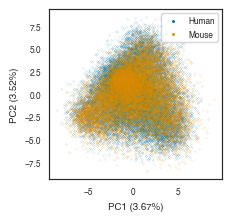

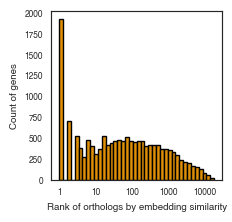

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


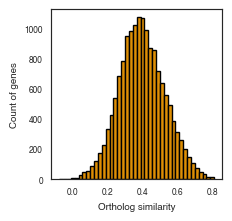

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


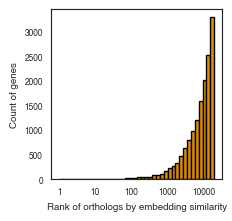

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


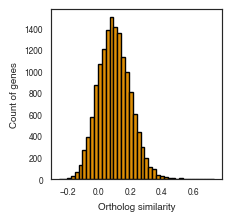

In [12]:
dir_without_uid = f"{config.proj_path}/results/anal/{exp}/{exp}.epoch{epoch}.unsupervised"
muse_result_uid_dir = get_muse_result_uid_dir(dir_without_uid)
rank_simi_results_dicts_for_gene_pair_of_interest = eval_MUSE_emb(dir_without_uid, params, config, njson, output_prefix=f"{dir_without_uid}/after_MUSE")
after_muse_rank_simi_results_dicts[f"{exp}.unsupervised"] = rank_simi_results_dicts_for_gene_pair_of_interest

In [ ]:
# Subsampling experiment
exp = njson.exp
tot = 10
for i in range(1, tot+1):
    dir_without_uid = f"{config.proj_path}/results/anal/{exp}/{exp}.epoch{epoch}.full_spv_subsampled_{i}of{tot}"
    muse_result_uid_dir = get_muse_result_uid_dir(dir_without_uid)
    rank_simi_results_dicts_for_gene_pair_of_interest = eval_MUSE_emb(dir_without_uid, params, config, njson, output_prefix=f"{dir_without_uid}/after_MUSE")
    after_muse_rank_simi_results_dicts[f"{exp}.subsampled_{i}of{tot}"] = rank_simi_results_dicts_for_gene_pair_of_interest

In [ ]:
# Across epochs
exp = njson.exp
for epoch in [1, 3, 5, 10, 15, 20, 30, 40]:
    dir_without_uid = f"{config.proj_path}/results/anal/{exp}/{exp}.epoch{epoch}.full_supervised"
    muse_result_uid_dir = get_muse_result_uid_dir(dir_without_uid)
    rank_simi_results_dicts_for_gene_pair_of_interest = eval_MUSE_emb(dir_without_uid, params, config, njson, output_prefix=f"{dir_without_uid}/after_MUSE")
    after_muse_rank_simi_results_dicts[f"{exp}.epoch{epoch}"] = rank_simi_results_dicts_for_gene_pair_of_interest

In [14]:
import pickle
pkl_file = config.proj_path + f"/results/anal/stat/after_muse_rank_simi_results_dicts.pkl"
with open(pkl_file, "wb") as f:
    pickle.dump(after_muse_rank_simi_results_dicts, f)

In [9]:
after_muse_rank_simi_results_dicts.keys()

dict_keys(['exp6_hm_GPT_coding', 'random_emb', 'exp41_GPT_hm_fakenh_coding', 'exp16_hm_BERT_coding', 'emb_without_anchors', 'exp6_hm_GPT_coding.subsampled_1of10', 'exp6_hm_GPT_coding.subsampled_2of10', 'exp6_hm_GPT_coding.subsampled_3of10', 'exp6_hm_GPT_coding.subsampled_4of10', 'exp6_hm_GPT_coding.subsampled_5of10', 'exp6_hm_GPT_coding.subsampled_6of10', 'exp6_hm_GPT_coding.subsampled_7of10', 'exp6_hm_GPT_coding.subsampled_8of10', 'exp6_hm_GPT_coding.subsampled_9of10', 'exp6_hm_GPT_coding.subsampled_10of10', 'exp6_hm_GPT_coding.epoch1', 'exp6_hm_GPT_coding.epoch3', 'exp6_hm_GPT_coding.epoch5', 'exp6_hm_GPT_coding.epoch10', 'exp6_hm_GPT_coding.epoch15', 'exp6_hm_GPT_coding.epoch20', 'exp6_hm_GPT_coding.epoch30', 'exp6_hm_GPT_coding.epoch40', 'exp6_hm_GPT_coding.unsupervised'])